![My Logo](https://thoughtsociety.org/wp-content/uploads/2019/03/ts_notebook_header.png)

# Machine Learning Quick-Start

We will be exploring and learning about supervised ML

## Linear Regression - Predict Stock Price

What if we have historic stock prices and we want to predict future prices?
We could use Simple Linear Regression for this since it has continuous variables for price over time.

With Linear Regression, we could model a function that predicts new points along a line that derived from known points that came before.

In order for this to be effective, we need to re-structure the data, split it into train and test and to scale it.

We can then use a linear regression model from scikitlearn, fit it (train), predict the future prices, run some scoring and then plot the predicted values onto the end of the known ones.

#### Continue with

$ y=f(X) $

Where we want to predict $y$ from a $f(X)$ where $f$ is a model that we can teach.
Once we make a prediction $y$, we can measure its error against known $X$ values and strive to lower the error rate. Being careful not to overdo this improvement step else we enter into Over/Under-fitting territory.

### Overfitting/Underfitting

We look to use induction where generalized concepts may be learned from specific examples. Generalization is measured by how well the model predicts new, unknown data (unlabeled) after having been trained on labeled data.

This measure is referred to in machine learning as 'Overfitting' and 'Underfitting'.

Good sources on this concept:

[Overfitting/Underfitting in Machine Learning from Machinelearningmaster.com](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)

[Anecdotal description of overfitting & undefitting on Quora](https://qr.ae/TWpFCz)

**Overfitting** occurs as the result of a model paying too much attention to noise and outliers. The effect will be a decrease in the model's ability to generalize new data based on this overfitted model. Excessive tuning passes could cause the model to go past optimum state (lowest error rate) and pay too much attention to outliers. 

**Underfitting** is when the algorithm does not fit the data well enough.

### With some inspiration from:

`Harrison Kinsley @ pythonprogramming.net`

`Chris Albon @ chrisalbon.com`

`Jason Brownlee, PhD. @ machinelearningmastery.com`

`Jose Portilla @ udemy.com`

#### Whose diligence has spread far and wide to aspirants of Data Science

### Steps we will take:

1. Get Apple (or Google) historic stock data from Quandl using our API key
2. Using Quandl.get, create a pandas dataframe from the request
3. Do EDA - Exploratory Data Analysis
4. Show the head() - noting that there are around 2500 entries with 12 columns (features)
5. Plot the 'Adj. Close' of the stock
6. Re-structure dataframe to include relevant info
7. Create HL_PCT and PCT_Change from high, low open and close
8. Restructure dataframe with new values
9. Fill NaN's with 99999
11. Do shifts of forecast_out
12. Assign X and y
13. Pre-process X
14. Create train_test_split
15. Instantiate LinearRegression as the clf (Classifier)
16. Fit the model
17. Score the confidence show it
18. Synthesize a date array
19. Plot the forecast on the tail of the 'Adj. Close'

##  Stock Price Prediction using Regression

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

In [3]:
%matplotlib inline

In [4]:
# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import math

from sklearn import metrics



In [6]:
import quandl

In [7]:
my_quandl_token = "L1VxXhzaNadM1uEHDZ_3"

In [8]:
quandl.ApiConfig.api_key = my_quandl_token

In [9]:
AAPL = quandl.get("WIKI/AAPL", start_date="2008-01-01", end_date="2018-12-31")

In [10]:
#GOOG = quandl.get("WIKI/GOOGL", start_date="2008-01-01", end_date="2018-12-31")

In [11]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2008-01-02,199.27,200.26,192.55,194.84,38542100.0,0.0,1.0,25.608972,25.736201,24.745359,25.039656,269794700.0
2008-01-03,195.41,197.39,192.69,194.93,30073800.0,0.0,1.0,25.112909,25.367366,24.763351,25.051222,210516600.0
2008-01-04,191.45,193.00,178.89,180.05,51994000.0,0.0,1.0,24.603993,24.803190,22.989858,23.138934,363958000.0
2008-01-07,181.25,183.60,170.23,177.64,74006900.0,0.0,1.0,23.293151,23.595159,21.876928,22.829216,518048300.0
2008-01-08,180.14,182.46,170.80,171.25,54422000.0,0.0,1.0,23.150501,23.448653,21.950181,22.008012,380954000.0


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2575 entries, 2008-01-02 to 2018-03-27
Data columns (total 12 columns):
Open           2575 non-null float64
High           2575 non-null float64
Low            2575 non-null float64
Close          2575 non-null float64
Volume         2575 non-null float64
Ex-Dividend    2575 non-null float64
Split Ratio    2575 non-null float64
Adj. Open      2575 non-null float64
Adj. High      2575 non-null float64
Adj. Low       2575 non-null float64
Adj. Close     2575 non-null float64
Adj. Volume    2575 non-null float64
dtypes: float64(12)
memory usage: 261.5 KB


In [13]:
style.use('ggplot')

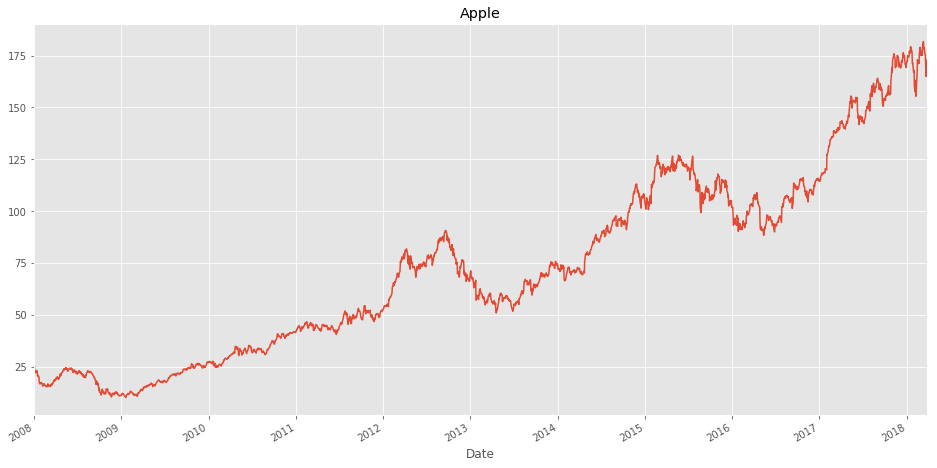

In [14]:
AAPL['Adj. Close'].plot(label='Apple',figsize=(16,8),title='Apple')

In [15]:
#AAPL['Adj. Close'].plot(label='Apple',figsize=(16,8),title='Apple')

In [16]:
df = AAPL[['Adj. Open', 'Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [17]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0

In [18]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [19]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2008-01-02   25.039656  4.004155   -2.223114  269794700.0
2008-01-03   25.051222  2.439151   -0.245637  210516600.0
2008-01-04   23.138934  7.887529   -5.954557  363958000.0
2008-01-07   22.829216  7.854080   -1.991724  518048300.0
2008-01-08   22.008012  6.826698   -4.935051  380954000.0


In [20]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.03 * len(df)))

In [21]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2008-01-02,25.039656,4.004155,-2.223114,269794700.0,21.711145
2008-01-03,25.051222,2.439151,-0.245637,210516600.0,21.812671
2008-01-04,23.138934,7.887529,-5.954557,363958000.0,22.135241
2008-01-07,22.829216,7.854080,-1.991724,518048300.0,22.496365
2008-01-08,22.008012,6.826698,-4.935051,380954000.0,22.354999


In [22]:
df.dropna(inplace=True)

In [23]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

In [24]:
from sklearn import preprocessing as prpr
X = prpr.scale(X)
X

array([[-1.08801631,  0.98511379, -1.3489896 ,  1.75490158],
       [-1.08773568,  0.09872576, -0.14490456,  1.09592848],
       [-1.13413361,  3.18458203, -3.62106389,  2.80168078],
       ...,
       [ 2.41654699,  0.66887264, -1.10640242, -0.7908791 ],
       [ 2.47405041, -0.03863465,  0.51199101, -0.79772646],
       [ 2.45463997, -0.2172271 ,  0.39877376, -0.80419954]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Linear Regression

In [26]:
clf = LinearRegression(n_jobs=-1)

In [27]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [28]:
confidence = clf.score(X_test, y_test)

In [29]:
print(confidence)

0.9475540114752588


In [30]:
X = np.array(df.drop(['label'], 1))
len(X)

2497

In [31]:
X_lately = X[-forecast_out:]
#X = X[:-forecast_out]
len(X_lately)

78

In [32]:
df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set,accuracy, forecast_out)

[164.59732026 166.90035638 168.52524573 168.0031317  165.0999889
 164.66153715 164.40679779 166.91983668 167.1312038  166.59425893
 166.77462376 168.48042307 169.93110359 170.18257779 170.78348238
 171.24501943 169.3165578  169.18023711 168.40884946 165.75275688
 168.33915833 166.93085748 166.06073167 165.29959379 166.29141348
 165.76212409 165.84412568 162.76351466 160.36893121 158.24620598
 157.16564185 159.91075821 161.16757278 160.43340507 161.20269846
 161.09945145 161.71463116 160.62772552 162.47341204 162.47432723
 163.08442206 163.48955596 163.75873364 163.33249301 164.14558273
 166.99027635 167.64482913 166.96409574 162.51672524 163.26408107
 163.42426138 164.27863695 163.72209163 164.58225624 169.88557198
 173.42669331 175.7535034  174.0859812  175.03546058 178.52106704
 181.03612441 181.68468892 182.8126046  181.44361595 181.00793554
 178.42384994 175.93113973 178.02797224 177.19763853 177.07911614
 180.18429038 181.83306911 182.06679442 181.14154063 180.18750082
 176.644300

In [33]:
df['Forecast'] = np.nan

In [34]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [35]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

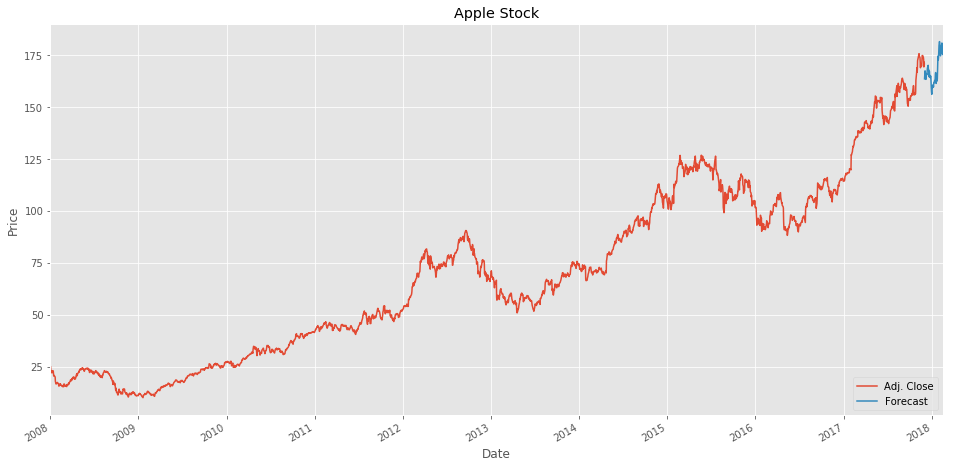

In [35]:
# df['RM50'] = df['Adj. Close'].rolling(50).mean()

df['Adj. Close'].plot(figsize=(16,8))
df['Forecast'].plot(figsize=(16,8))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock')
plt.show()